## 로지스틱 회귀로 와인 분류하기


In [39]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [40]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [41]:
wine.info() #누락값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [42]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [43]:
#데이터프레임 -> 넘파이 배열로 바꾸기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [44]:
#훈련데이터 세트와 테스트 데이터 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,test_size=0.2,random_state = 42)
#train_test_split()함수의 기본 test 설정 25%, 여기서는 test size 20%으로 설정

In [45]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trian_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [48]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8615384615384616


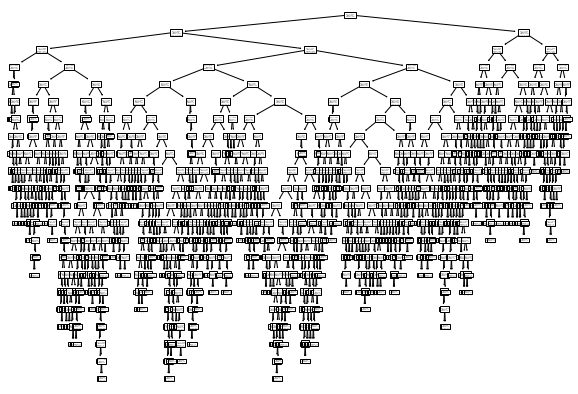

In [50]:
#그림으로 표현
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

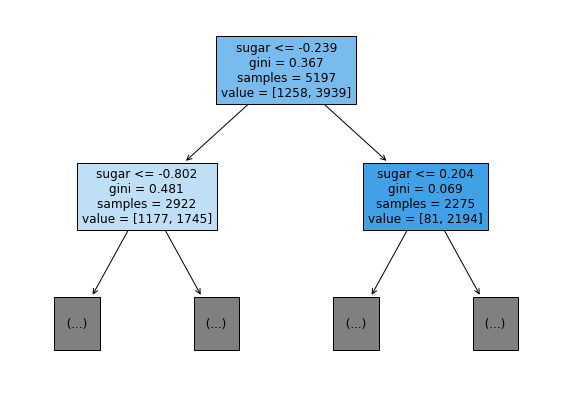

In [51]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1,filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 가지치기

In [52]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


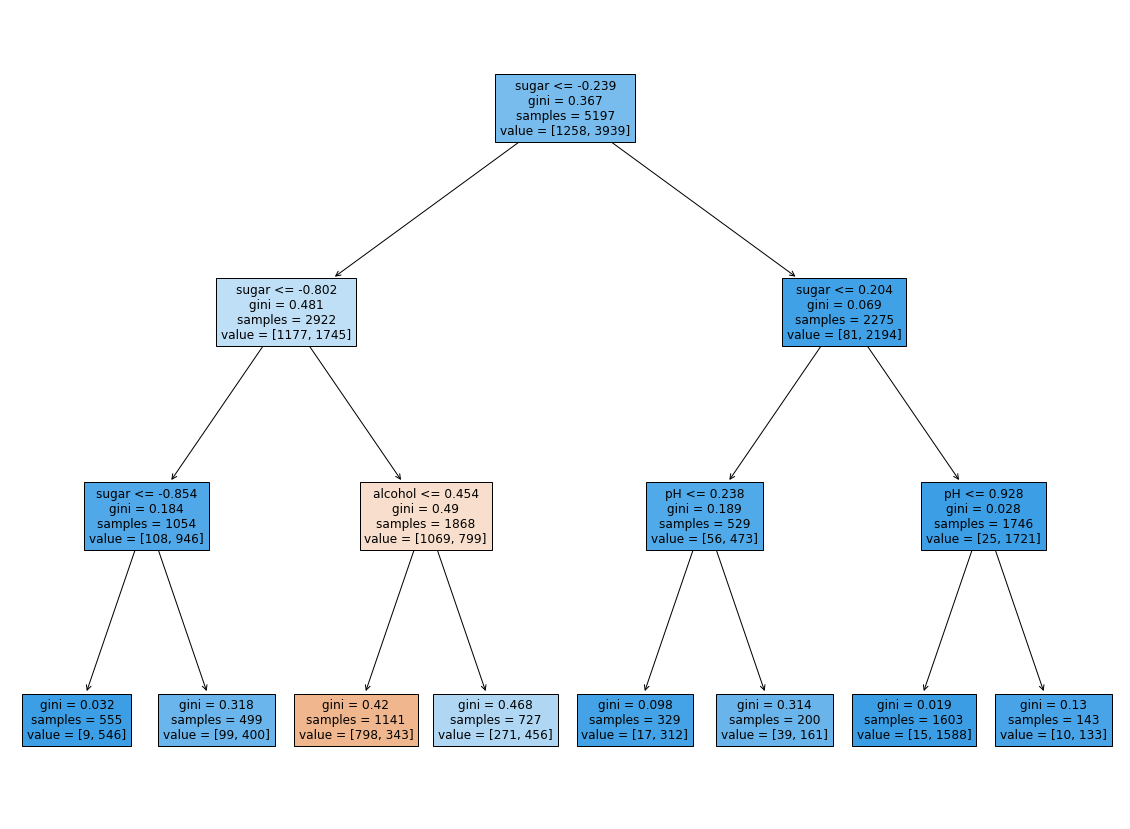

In [53]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [59]:
#전처리 전 데이터로 dt 훈련
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


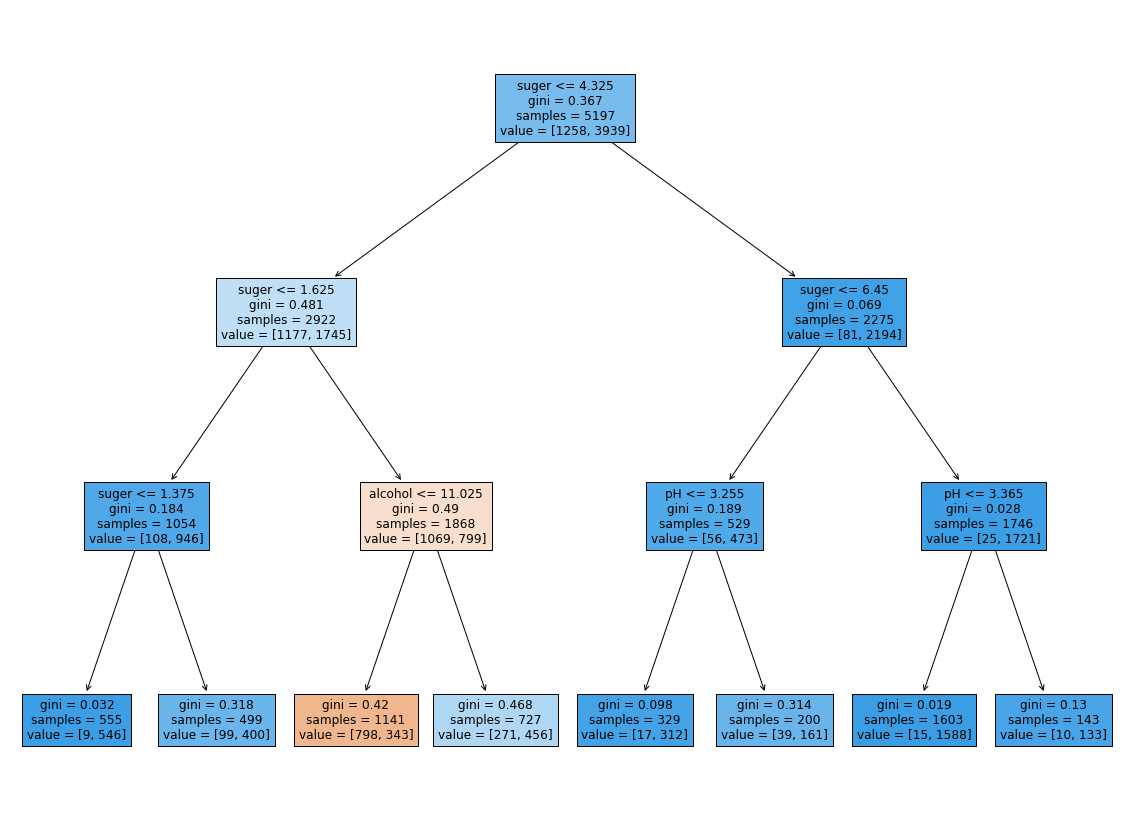

In [61]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'suger', 'pH'])
plt.show()